In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use(style="seaborn-v0_8-talk")
sns.set_theme(style="darkgrid")

In [16]:
df = pd.read_csv('./data/EIS_state_I_25C05.txt', sep='\t')

In [8]:
df.describe()

,time/s,cycle number,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg
count,2.100000e+04,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,2.501868e+06,175.50000,1596.911480,1.029664,0.169955,1.047096,-9.106228
std,1.372127e+06,101.03829,3909.495157,0.506063,0.118541,0.512674,5.020847
min,7.520784e+03,1.00000,0.019990,0.349990,-0.043440,0.352420,-21.775130
25%,1.321104e+06,88.00000,0.635707,0.572218,0.087277,0.581157,-12.923192
50%,2.571755e+06,175.50000,20.139075,0.896600,0.148525,0.927800,-9.247750
75%,3.729412e+06,263.00000,636.107820,1.424268,0.236290,1.436440,-5.441555
max,4.672091e+06,350.00000,20004.453000,2.486100,0.638490,2.558010,6.911930


In [9]:
df.keys()

Index(['time/s', 'cycle number', 'freq/Hz', 'Re(Z)/Ohm', '-Im(Z)/Ohm',
       '   |Z|/Ohm', '   Phase(Z)/deg'],
      dtype='object')

In [10]:
df_cycle = df.groupby('cycle number')
df_cycle.describe()

time/s                                                       \
              count          mean        std           min           25%   
cycle number                                                               
1.0            60.0  7.546877e+03  52.905366  7.520784e+03  7.523898e+03   
2.0            60.0  2.369679e+04  52.905367  2.367070e+04  2.367381e+04   
3.0            60.0  3.960142e+04  52.905306  3.957533e+04  3.957844e+04   
4.0            60.0  5.535752e+04  52.905166  5.533143e+04  5.533455e+04   
5.0            60.0  7.101376e+04  52.905369  7.098767e+04  7.099079e+04   
...             ...           ...        ...           ...           ...   
346.0          60.0  4.631848e+06  52.905371  4.631822e+06  4.631825e+06   
347.0          60.0  4.642048e+06  52.905096  4.642022e+06  4.642025e+06   
348.0          60.0  4.651995e+06  52.905398  4.651968e+06  4.651972e+06   
349.0          60.0  4.661932e+06  52.905413  4.661905e+06  4.661909e+06   
350.0          60.0  4.671846e+06  52.905428  4.671820e+06  4.671823e+06   

                                                       freq/Hz              \
                       50%           75%           max   count        mean   
cycle number                                                                 
1.0           7.527396e+03  7.536231e+03  7.791700e+03    60.0  1596.91148   
2.0           2.367731e+04  2.368615e+04  2.394162e+04    60.0  1596.91148   
3.0           3.958194e+04  3.959078e+04  3.984625e+04    60.0  1596.91148   
4.0           5.533804e+04  5.534688e+04  5.560235e+04    60.0  1596.91148   
5.0           7.099428e+04  7.100312e+04  7.125859e+04    60.0  1596.91148   
...                    ...           ...           ...     ...         ...   
346.0         4.631828e+06  4.631837e+06  4.632092e+06    60.0  1596.91148   
347.0         4.642028e+06  4.642037e+06  4.642293e+06    60.0  1596.91148   
348.0         4.651975e+06  4.651984e+06  4.652239e+06    60.0  1596.91148   
349.0         4.661912e+06  4.661921e+06  4.662176e+06    60.0  1596.91148   
350.0         4.671827e+06  4.671836e+06  4.672091e+06    60.0  1596.91148   

              ...    |Z|/Ohm             Phase(Z)/deg                      \
              ...        75%      max           count      mean       std   
cycle number  ...                                                           
1.0           ...   1.355830  1.60358            60.0 -8.422574  4.445198   
2.0           ...   1.347475  1.59516            60.0 -8.267860  4.376111   
3.0           ...   1.345007  1.60614            60.0 -8.229162  4.350009   
4.0           ...   1.341205  1.59074            60.0 -8.217105  4.339441   
5.0           ...   1.339552  1.60498            60.0 -8.208480  4.355162   
...           ...        ...      ...             ...       ...       ...   
346.0         ...   2.057637  2.51006            60.0 -9.937290  5.561480   
347.0         ...   2.056363  2.50358            60.0 -9.857654  5.521918   
348.0         ...   2.057020  2.55801            60.0 -9.850380  5.557775   
349.0         ...   2.060973  2.50933            60.0 -9.925383  5.562101   
350.0         ...   2.064845  2.52319            60.0 -9.923010  5.572716   

                                                                
                   min        25%       50%       75%      max  
cycle number                                                    
1.0          -14.38264 -12.632115 -9.010520 -4.763822  4.21264  
2.0          -14.04855 -12.393535 -8.742385 -4.646720  3.95623  
3.0          -14.01443 -12.153163 -8.758970 -4.574585  3.94696  
4.0          -13.97994 -12.145502 -8.592645 -4.621868  3.94667  
5.0          -13.98074 -12.308620 -8.669955 -4.608005  4.05400  
...                ...        ...       ...       ...      ...  
346.0        -21.72965 -13.172103 -9.120730 -6.235133  3.10367  
347.0        -21.47639 -12.813917 -9.011585 -6.223840  3.13134  
348.0        -21.12462 -12.953973 -8.977855 -6.315128  3.0914

In [4]:
def read_data(eis_file):
    EIS_list = []

    # eis in EIS_list:
    """
    eis = {
        cycle: int,
        size: int,
        freq: [],
        Re: [],
        Im: [],
    }
    """
    
    df_eis = pd.read_csv(eis_file, sep='\t').groupby('cycle number')
    for cycle, df in df_eis:
        freq = df['freq/Hz'].values
        Re = df['Re(Z)/Ohm'].values
        Im_neg = df['-Im(Z)/Ohm'].values
        size = len(freq)
        eis = {
            'cycle': cycle,
            'size': size,
            'freq': freq,
            'Re': Re,
            '-Im': Im_neg,
        }
        EIS_list.append(eis)

    
    return EIS_list

In [5]:
EIS1 = read_data('./data/EIS_state_I_25C01.txt')
EIS2 = read_data('./data/EIS_state_II_25C01.txt')
EIS3 = read_data('./data/EIS_state_III_25C01.txt')
EIS4 = read_data('./data/EIS_state_IV_25C01.txt')
EIS5 = read_data('./data/EIS_state_V_25C01.txt')
EIS6 = read_data('./data/EIS_state_VI_25C01.txt')
EIS9 = read_data('./data/EIS_state_IX_25C01.txt')


In [6]:
print(f"EIS1: {len(EIS1)}")
print(f"EIS2: {len(EIS2)}")
print(f"EIS3: {len(EIS3)}")
print(f"EIS4: {len(EIS4)}")
print(f"EIS5: {len(EIS5)}")
print(f"EIS6: {len(EIS6)}")
print(f"EIS9: {len(EIS9)}")

EIS1: 350
EIS2: 261
EIS3: 261
EIS4: 261
EIS5: 261
EIS6: 261
EIS9: 349


选择配色方案（sns的color_palette）

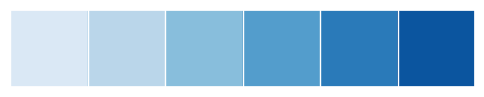

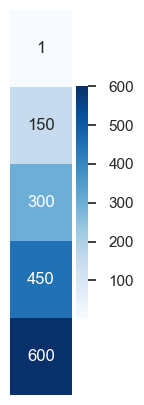

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PALETTE = "Blues"
sns.palplot(sns.color_palette(PALETTE))
matrix = np.linspace(1, 600, 5).reshape(5, 1).astype(int)
fig = plt.figure(figsize=(1, 5))
sns_plot = sns.heatmap(
    matrix,
    annot=True,
    cmap=PALETTE,
    cbar=True,
    fmt=".0f",
    xticklabels=False,
    yticklabels=False,
)
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_eis(EIS_list, plot_type='nyquist'):
    palette = sns.color_palette(PALETTE, n_colors=len(EIS_list))
    plt.figure(figsize=(10, 6))  # 稍微增加图的宽度以容纳图例

    if plot_type == 'nyquist':            
        for idx, eis in enumerate(EIS_list):
            plt.plot(eis['Re'], eis['-Im'], color=palette[idx], label=f'{eis["cycle"]}')
        plt.title("EIS Curve (Nyquist)")
        plt.xlabel("Re(Z)")
        plt.ylabel("-Im(Z)")
    
    elif plot_type == 're':
        for idx, eis in enumerate(EIS_list):
            plt.plot(eis['freq'][0:100], eis['Re'][0:100], color=palette[idx], label=f'Cycle {eis["cycle"]}')
        plt.title("EIS Curve (Real)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Re(Z)")
        
    elif plot_type == 'im':
        for idx, eis in enumerate(EIS_list):
            plt.plot(eis['freq'], eis['-Im'], color=palette[idx], label=f'Cycle {eis["cycle"]}')
        plt.title("EIS Curve (Imaginary)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("-Im(Z)")
        
    plt.legend(title="", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=0.1, title_fontsize='large')
    
    # plt.ylim(-0.01, 0.005)
    plt.subplots_adjust(right=0.75)
    plt.show()
    

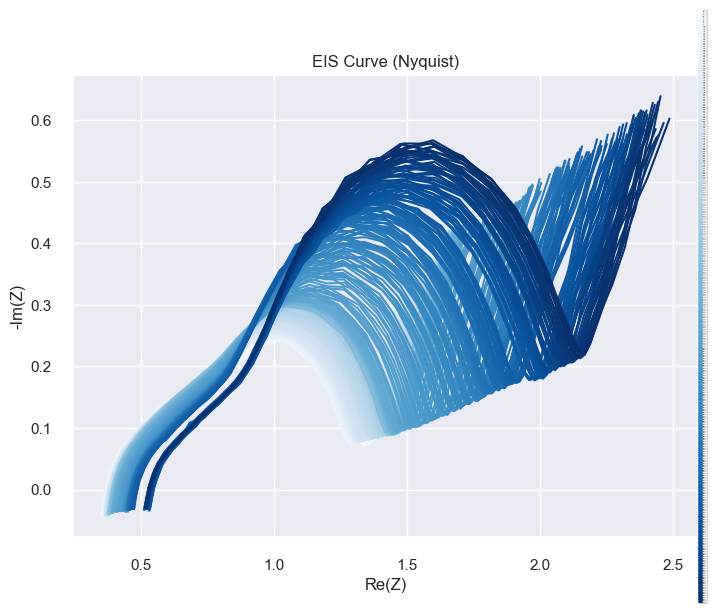

In [9]:
plot_eis(EIS1)

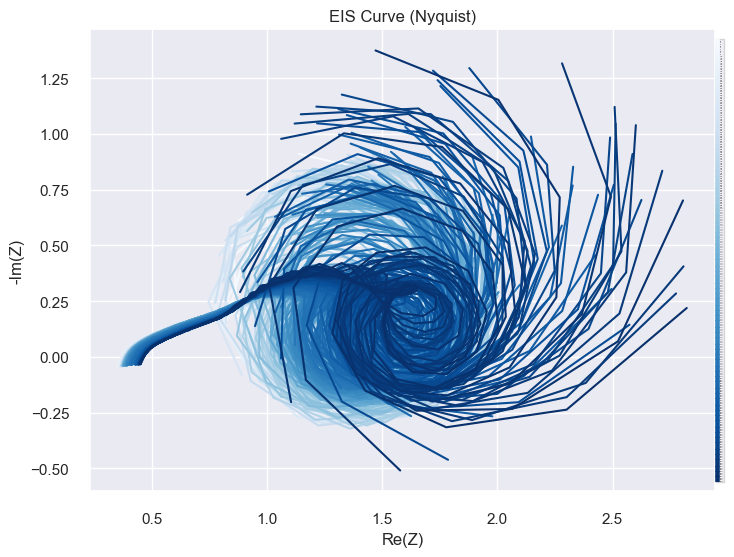

In [10]:
plot_eis(EIS2)

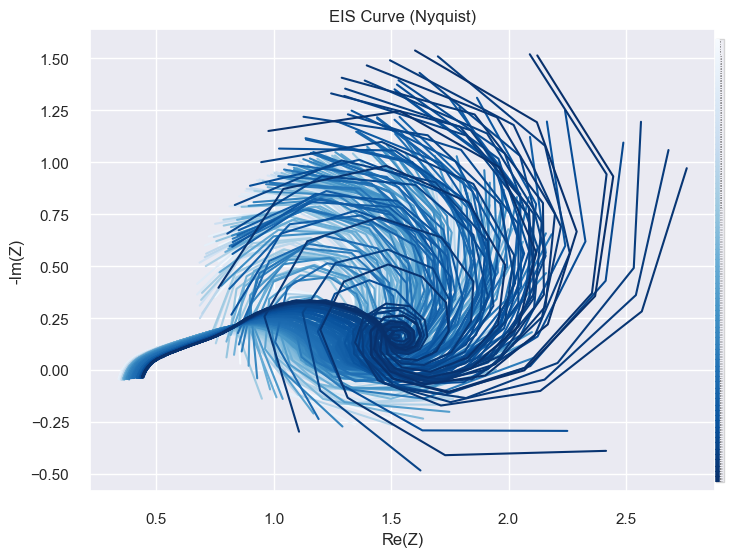

In [11]:
plot_eis(EIS3)

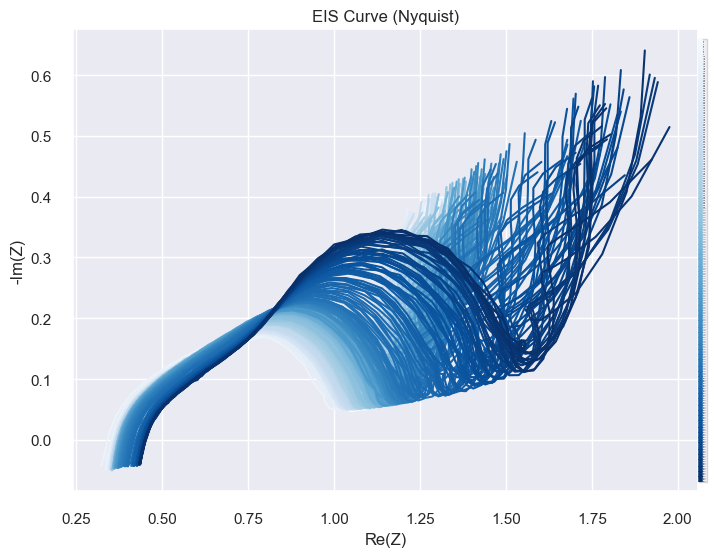

In [12]:
plot_eis(EIS4)

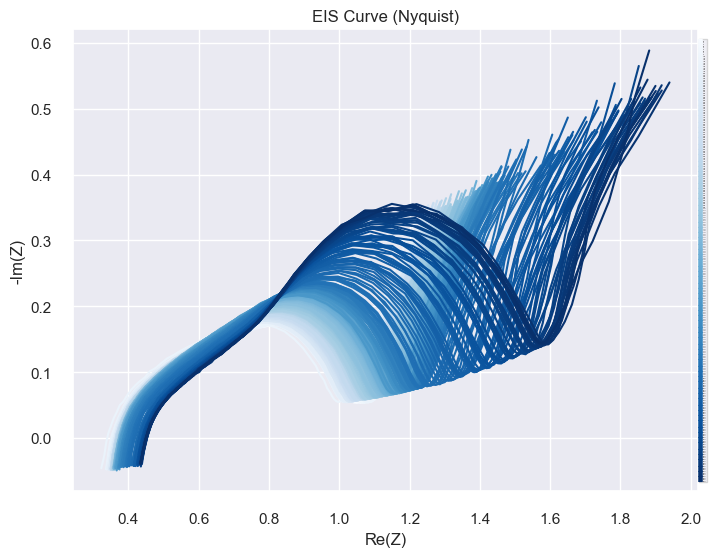

In [13]:
plot_eis(EIS5)

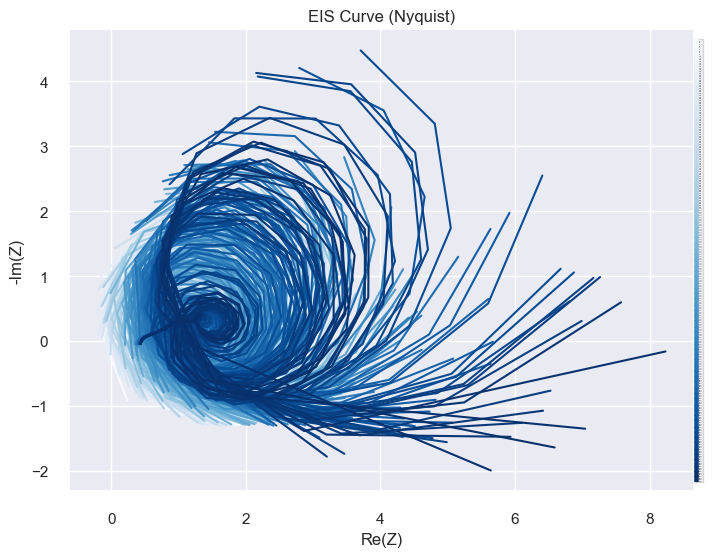

In [14]:
plot_eis(EIS6)

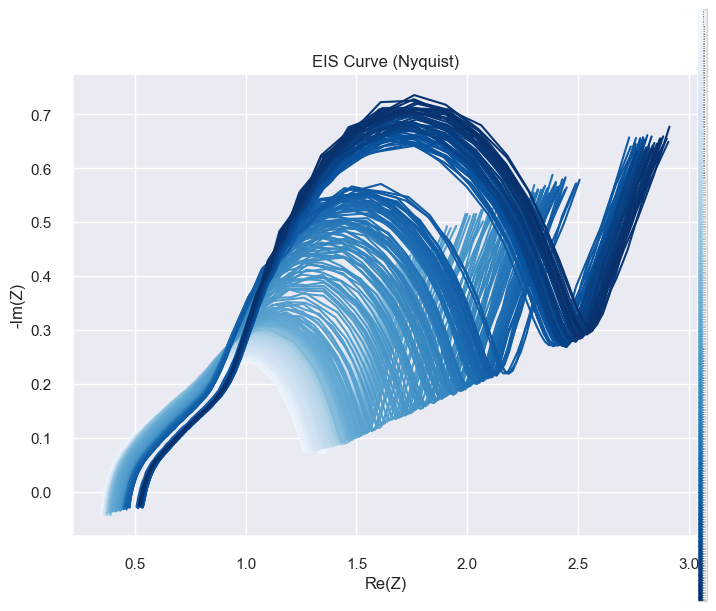

In [15]:
plot_eis(EIS9)

EIS5 的结果相对较好，对它进行更多观测

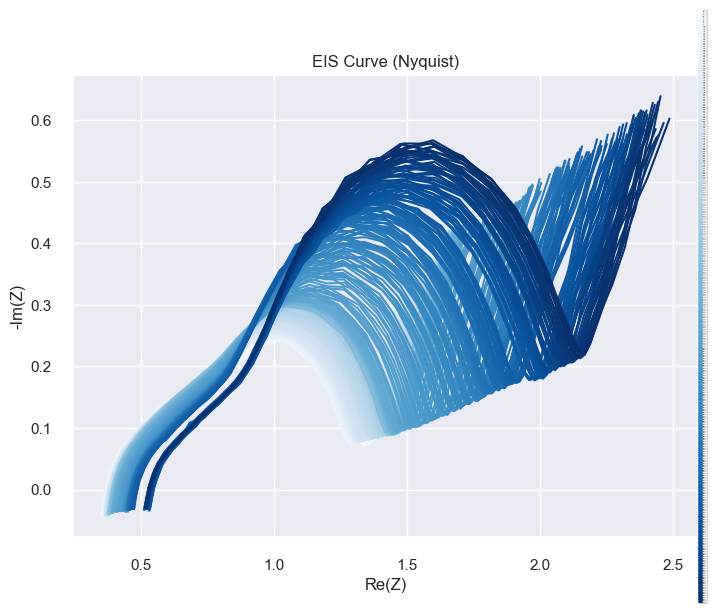

In [17]:
plot_eis(EIS1)

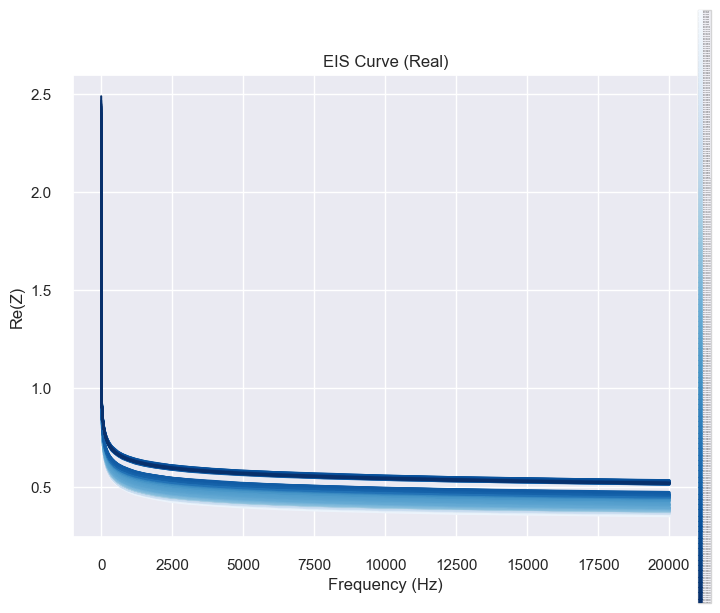

In [18]:
plot_eis(EIS1, plot_type='re')

20004.453 2430.7778


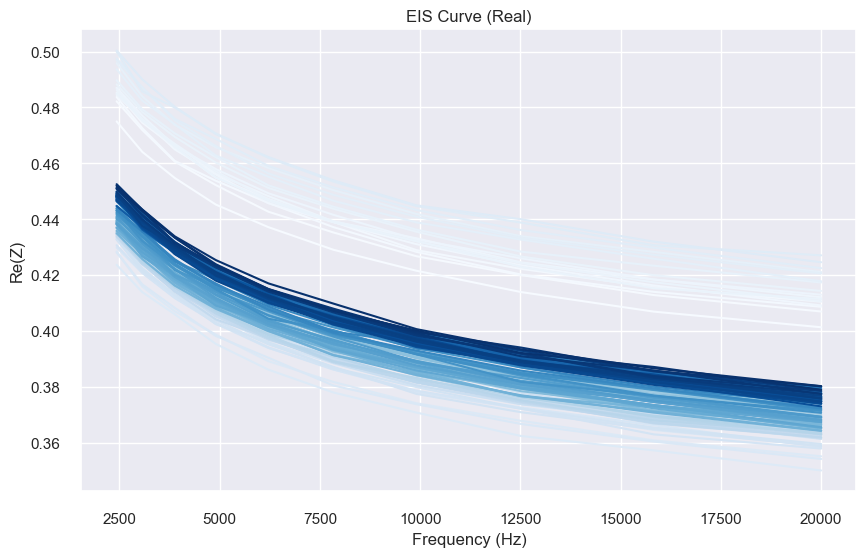

In [56]:
start = 0
end = 10

palette = sns.color_palette(PALETTE, n_colors=135)
plt.figure(figsize=(10, 6))
for idx, eis in enumerate(EIS1[0:135]):
    plt.plot(eis['freq'][start:end], eis['Re'][start:end], color=palette[idx])
plt.title("EIS Curve (Real)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Re(Z)")

print(eis['freq'][start], eis['freq'][end-1])
plt.show()

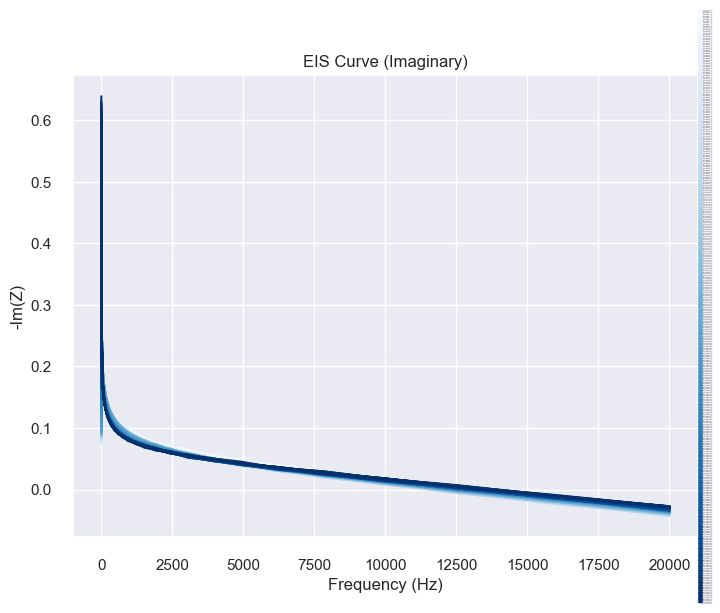

In [24]:
plot_eis(EIS1, plot_type='im')

20004.453 2430.7778


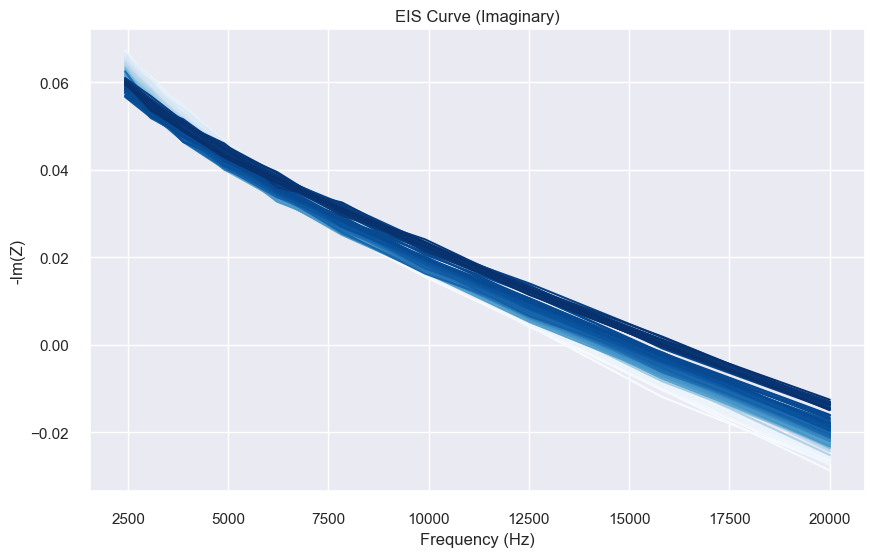

In [134]:
start = 0
end = 10

palette = sns.color_palette(PALETTE, n_colors=len(EIS5))
plt.figure(figsize=(10, 6))
for idx, eis in enumerate(EIS5):
    plt.plot(eis['freq'][start:end], eis['-Im'][start:end], color=palette[idx])
plt.title("EIS Curve (Imaginary)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("-Im(Z)")

print(eis['freq'][start], eis['freq'][end-1])
plt.show()

将eis保存为numpy数组，并储存为feature文件

In [132]:
import numpy as np

features = []

for eis in EIS5:
    # features.append(list(eis['Re']) + list(eis['-Im']))
    features.append(list(eis['Re'][0:20]))
    
features = np.array(features)

print(features.shape)

(275, 20)


In [136]:
np.save('features.npy', features)